In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('display.max_columns', 100)

In [2]:
feats = pd.read_csv('../to_csv/less_feats/features_importances.csv').rename(columns={'Unnamed: 0': 'Features'}).set_index('Features')
feats

,Importance
Features,
vlf,0.095022
hf,0.087703
lf,0.076631
lf_hf_ratio,0.076387
sampen,0.074137
sd1,0.051269
mean_hr,0.048720
cvi,0.042643
mean_nni,0.040086


In [3]:
xqrs = pd.read_csv('../to_csv/ml_data/xqrs_clean_mean.csv')
xqrs.head()

,Key,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label
0,train_01_tcp_ar_8643_s002_t005,0.0,665.457589,1.942364,1.532157,0.0,0.0,0.0,0.000000,1.532157,664.06250,3.90625,0.002302,0.002919,90.164234,90.352941,89.824561,0.253177,46.079051,5.06351,50.863572,22.475111,4.732654,3.087285,354.7016,0.517062,6.555356,19.970406,4.732654,0.0
1,train_01_tcp_ar_8643_s002_t005,10000.0,672.135417,11.762073,11.504201,0.0,0.0,1.0,6.666667,11.718750,675.78125,46.87500,0.017435,0.017500,89.294479,94.814815,88.275862,1.582749,46.079051,5.06351,50.863572,22.475111,4.732654,3.087285,354.7016,0.517062,6.555356,19.970406,4.732654,0.0
2,train_01_tcp_ar_8643_s002_t005,20000.0,657.031250,10.460751,9.002380,0.0,0.0,1.0,6.666667,9.511195,660.15625,42.96875,0.014476,0.015921,91.342484,96.603774,90.352941,1.471285,46.079051,5.06351,50.863572,22.475111,4.732654,3.087285,354.7016,0.517062,6.555356,19.970406,4.732654,0.0
3,train_01_tcp_ar_8643_s002_t005,30000.0,660.677083,2.499767,1.786586,0.0,0.0,0.0,0.000000,1.808242,660.15625,7.81250,0.002737,0.003784,90.817138,91.428571,90.352941,0.332091,46.079051,5.06351,50.863572,22.475111,4.732654,3.087285,354.7016,0.517062,6.555356,19.970406,4.732654,0.0
4,train_01_tcp_ar_8643_s002_t005,40000.0,663.330078,6.723404,2.240189,0.0,0.0,0.0,0.000000,2.470529,664.06250,15.62500,0.003724,0.010136,90.461400,91.428571,89.302326,0.885948,46.079051,5.06351,50.863572,22.475111,4.732654,3.087285,354.7016,0.517062,6.555356,19.970406,4.732654,0.0


In [4]:
text = 'train_01_tcp_ar_8643_s002_t005'

def reg(text):
    r = re.search(r'_(\d+)_s', text)
    if r:
        return r.group(1)

In [5]:
#xqrs['Patient'] = xqrs.Key.apply(reg).astype(str)

In [6]:
#cols = xqrs.columns.tolist()
#cols = cols[:2] + cols[-1:] + cols[3:-1]
#xqrs = xqrs[cols]

In [7]:
xqrs.describe(include='all')

,Key,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label
count,221491,2.214910e+05,221491.000000,221491.000000,221491.000000,221491.000000,221491.000000,221491.000000,221491.000000,221491.000000,221491.000000,221491.000000,221491.000000,221491.000000,221491.000000,221491.000000,221491.000000,221491.000000,221491.000000,221491.000000,221491.000000,221491.000000,221491.000000,221491.000000,221491.000000,221491.000000,221491.000000,221491.000000,221491.000000,221491.000000
unique,3268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,train_01_tcp_ar_11596_s002_t001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.727136e+05,735.057823,16.000518,10.160377,0.266427,2.151948,0.855640,6.908290,10.655047,736.497946,47.281026,0.013863,0.021198,85.978016,89.668630,83.924791,1.785199,452.490859,90.849923,324.035110,11.345634,5.224947,3.209804,800.234181,0.603753,7.916839,34.867854,5.224947,0.059272
std,NaN,4.463554e+05,168.720666,22.324514,13.772994,0.783497,6.328880,1.476986,12.044542,14.421351,170.248658,65.826438,0.018326,0.029429,19.737320,21.659257,19.707170,2.911204,1294.911787,287.470668,744.545064,13.370153,2.998795,0.858929,1125.834388,0.327117,8.813568,35.578717,2.998795,0.230961
min,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.881715,37.012048,34.133333,0.000000,0.000000,0.000000,0.000000,0.037210,0.256758,0.049837,0.361010,-0.000000,0.000000,0.000000,0.256758,0.000000
25%,NaN,1.600000e+05,621.093750,3.601347,2.376354,0.000000,0.000000,0.000000,0.000000,2.470529,621.093750,11.718750,0.003839,0.005377,72.436568,75.294118,70.136986,0.462959,20.614592,1.982029,19.363746,3.896191,3.240417,2.550748,181.700957,0.364404,2.005102,10.838141,3.240417,0.000000
50%,NaN,3.500000e+05,715.401786,8.731283,5.212484,0.000000,0.000000,0.000000,0.000000,5.537749,716.000000,27.343750,0.007480,0.011977,83.970673,86.779661,81.967213,0.946977,106.605551,12.488729,85.605617,8.045366,4.521684,3.245356,453.917730,0.568158,4.820850,23.626503,4.521684,0.000000
75%,NaN,6.100000e+05,829.666667,19.207210,12.109466,0.000000,0.000000,1.000000,9.090909,12.739624,832.031250,56.000000,0.016392,0.024773,96.740704,100.671141,94.339623,1.934644,415.683687,63.797246,323.752134,14.824881,6.345117,3.855849,995.678212,0.788457,10.423876,46.701241,6.345117,0.000000


In [8]:
cols_to_take = feats.index.tolist()[:6]
cols_to_take.extend(['Key', 'label'])
cols_to_take = cols_to_take[-2:-1] + cols_to_take[:6] + cols_to_take[-1:]
cols_to_take

['Key', 'vlf', 'hf', 'lf', 'lf_hf_ratio', 'sampen', 'sd1', 'label']

In [9]:
xqrs = xqrs[cols_to_take]

In [10]:
xqrs.to_csv('../to_csv/less_feats/top_5_feats.csv')

In [11]:
train = xqrs[xqrs['Key'].str.match('train')]
dev = xqrs[xqrs['Key'].str.match('dev')]

In [12]:
train.shape[0]

180206

In [13]:
dev.shape[0]

41285

In [14]:
(train.shape[0] / xqrs.shape[0]) * 100

81.36041645032981

In [15]:
xqrs.shape[0] - train.shape[0] - dev.shape[0]

0

In [16]:
X_train = train.iloc[:,2:-1]
y_train = train.iloc[:,-1:]

X_test = dev.iloc[:,2:-1]
y_test = dev.iloc[:,-1:]

In [17]:
y_train.label = y_train.label.apply(lambda x: 1 if x != 0 else 0)
y_test.label = y_test.label.apply(lambda x: 1 if x != 0 else 0)

In [18]:
y_train.label.value_counts()

0    169772
1     10434
Name: label, dtype: int64

In [19]:
y_test.label.value_counts()

0    37086
1     4199
Name: label, dtype: int64

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split

In [21]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns

categorical_features = X_train.select_dtypes(include=['object']).columns

In [22]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [23]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

In [25]:
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['hf', 'lf', 'lf_hf_ratio', 'sampen', 'sd1'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [26]:
y_pred_train = rf.predict(X_train)

In [27]:
rf.score(X_train, y_train)

0.9981077211635573

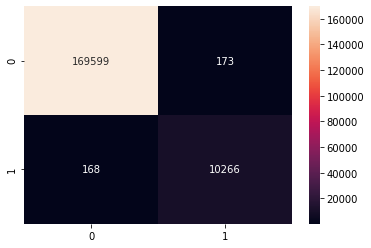

In [28]:
from sklearn.metrics import confusion_matrix, f1_score

cm = confusion_matrix(y_train, y_pred_train)

sns.heatmap(cm, annot=True, fmt='d')

In [29]:
f1_score(y_train, y_pred_train)

0.9836631054472283

In [30]:
y_pred = rf.predict(X_test)

In [31]:
rf.score(X_test, y_test)

0.8959428363812523

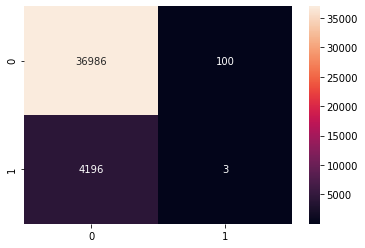

In [32]:
from sklearn.metrics import confusion_matrix, f1_score

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')

In [33]:
# f1_score
f1_score(y_pred, y_test)

0.001394700139470014

In [34]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]
    
for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', DecisionTreeClassifier())])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_pred_train = pipe.predict(X_train)
    cm = confusion_matrix(y_train, y_pred_train)
    print(classifier)
    print("model F1 score train: %.3f" % f1_score(y_train, y_pred_train))
    print("model F1 score test: %.3f" % f1_score(y_test, y_pred))
    print()
    print("model score train: %.3f" % pipe.score(X_train, y_train))
    print("model score test: %.3f" % pipe.score(X_test, y_test))
    print('cm train')
    print(cm)
    cm = confusion_matrix(y_test, y_pred)
    print('cm train')
    print(cm)

KNeighborsClassifier(n_neighbors=3)
model F1 score train: 0.984
model F1 score test: 0.076

model score train: 0.998
model score test: 0.851
cm train
[[169599    173]
 [   164  10270]]
cm train
[[34894  2192]
 [ 3945   254]]
DecisionTreeClassifier()
model F1 score train: 0.984
model F1 score test: 0.077

model score train: 0.998
model score test: 0.851
cm train
[[169599    173]
 [   164  10270]]
cm train
[[34876  2210]
 [ 3941   258]]
RandomForestClassifier()
model F1 score train: 0.984
model F1 score test: 0.072

model score train: 0.998
model score test: 0.851
cm train
[[169599    173]
 [   164  10270]]
cm train
[[34896  2190]
 [ 3959   240]]
AdaBoostClassifier()
model F1 score train: 0.984
model F1 score test: 0.078

model score train: 0.998
model score test: 0.852
cm train
[[169599    173]
 [   164  10270]]
cm train
[[34917  2169]
 [ 3941   258]]
GradientBoostingClassifier()
model F1 score train: 0.984
model F1 score test: 0.080

model score train: 0.998
model score test: 0.852
cm 

In [35]:
len(train.Key.unique())

2647

In [36]:
len(dev.Key.unique())

621

In [37]:
X_train.shape

(180206, 5)

In [38]:
X_test.shape

(41285, 5)

In [39]:
X_train.columns.tolist()

['hf', 'lf', 'lf_hf_ratio', 'sampen', 'sd1']